<a href="https://colab.research.google.com/github/javohir-ergashboyev/DL-projects/blob/main/Potato_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/training',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2162 files belonging to 3 classes.


In [4]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)
  print(label_batch.numpy())

(256, 256, 3)
[0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


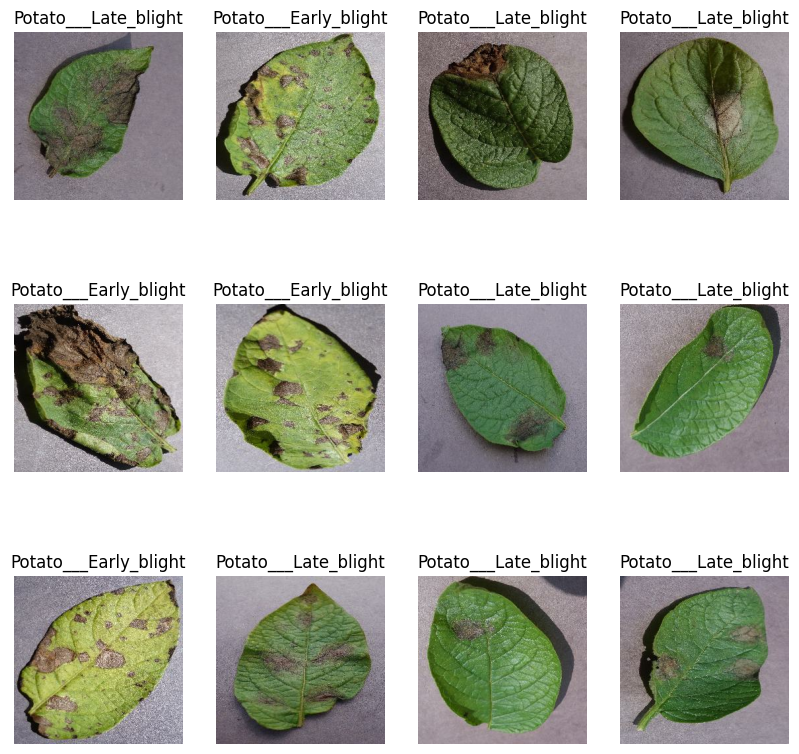

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(dataset.class_names[label_batch[i]])
    plt.axis('off')

In [8]:
def get_split_datset(ds, train_s=0.8, test_s=0.1, valid_s=0.1, shuffle=True, shuffle_size=10000):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=12)
  train_size=int(train_s*ds_size)
  valid_size=int(valid_s*ds_size)
  train_ds=ds.take(train_size)
  valid_ds=ds.skip(train_size).take(valid_size)
  test_ds=ds.skip(train_size).skip(valid_size)
  return train_ds, test_ds, valid_ds

In [9]:
train_ds, test_ds, val_ds=get_split_datset(dataset)

In [10]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

MODEL Building

In [13]:
num_class=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
model=tf.keras.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_class, activation='softmax')
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [22]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 4s 79ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0129 - val_accuracy: 0.9948
Epoch 2/50
54/54 [==============================] - 3s 59ms/step - loss: 0.0162 - accuracy: 0.9925 - val_loss: 0.0354 - val_accuracy: 0.9896
Epoch 3/50
54/54 [==============================] - 3s 60ms/step - loss: 0.0463 - accuracy: 0.9838 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.0258 - accuracy: 0.9902 - val_loss: 0.0109 - val_accuracy: 0.9948
Epoch 5/50
54/54 [==============================] - 3s 63ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.0648 - accuracy: 0.9792 - val_loss: 0.0697 - val_accuracy: 0.9740
Epoch 7/50
54/54 [==============================] - 3s 60ms/step - loss: 0.0238 - accuracy: 0.9919 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 8/50
54

In [23]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 27ms/step - loss: 0.0348 - accuracy: 0.9922


[0.03478224202990532, 0.9921875]

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
loss=history.history['loss']
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']

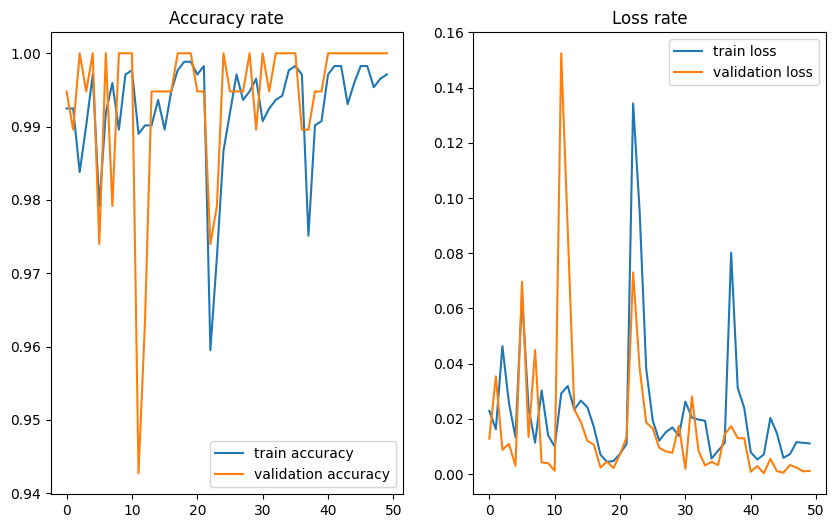

In [26]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy, label='train accuracy')
plt.plot(range(EPOCHS), val_accuracy,label='validation accuracy')
plt.title('Accuracy rate')
plt.legend(loc=('lower right'))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='train loss')
plt.plot(range(EPOCHS), val_loss,label='validation loss')
plt.title('Loss rate')
plt.legend(loc=('upper right'))
plt.show()

True label:  Potato___Late_blight
1/1 [==============================] - 0s 40ms/step
Predicted label:  Potato___Late_blight


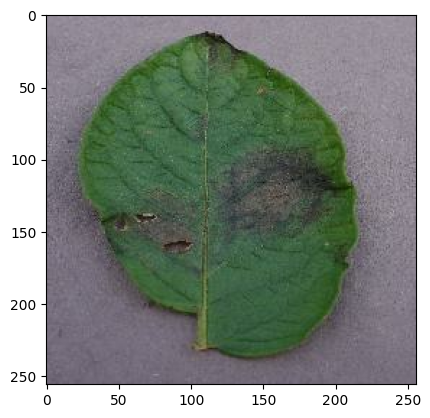

In [27]:
import numpy as np
for img_batch, label_batch in test_ds.take(1):
    img1=img_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()
    plt.imshow(img1)
    print('True label: ', dataset.class_names[label1])
    predict=model.predict(img_batch)
    print('Predicted label: ', dataset.class_names[np.argmax(predict[0])])


In [33]:
model.save('potato_disease.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
